In [78]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


In [79]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

In [80]:
# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [81]:

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [82]:
# Define parameter sets for different clustering techniques
kmeans_params = [(3, 'euclidean'), (4, 'euclidean'), (3, 'cosine')]
dbscan_params = [(0.5, 5), (1.0, 5), (1.5, 5)]
agg_params = [(3, 'euclidean'), (4, 'euclidean'), (3, 'euclidean')]  # Changed 'cosine' to 'euclidean'
gmm_params = [(3, 'full'), (4, 'full'), (3, 'tied')]
spectral_params = [(3, 'rbf'), (4, 'rbf'), (3, 'nearest_neighbors')]

In [83]:
# Store results
results = []

In [84]:
for method, params in [('KMeans', kmeans_params),
                       ('DBSCAN', dbscan_params),
                       ('Agglomerative', agg_params),
                       ('GMM', gmm_params),
                       ('Spectral', spectral_params)]:
    for param_set in params:
        if method == 'KMeans':
            clustering = KMeans(n_clusters=param_set[0], random_state=42)
        elif method == 'DBSCAN':
            clustering = DBSCAN(eps=param_set[0], min_samples=param_set[1])
        elif method == 'Agglomerative':
            clustering = AgglomerativeClustering(n_clusters=param_set[0], affinity=param_set[1])
        elif method == 'GMM':
            clustering = GaussianMixture(n_components=param_set[0], covariance_type=param_set[1], random_state=42)
        elif method == 'Spectral':
            clustering = SpectralClustering(n_clusters=param_set[0], affinity=param_set[1], random_state=42)
        
        clusters = clustering.fit_predict(X_scaled)
        
        silhouette = silhouette_score(X_scaled, clusters)
        calinski_harabasz = calinski_harabasz_score(X_scaled, clusters)
        davies_bouldin = davies_bouldin_score(X_scaled, clusters)
        
        results.append((method, param_set, silhouette, calinski_harabasz, davies_bouldin))

C:\Users\powar\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\powar\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\powar\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\powar\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attri

In [85]:
# Create DataFrame for results
results_df = pd.DataFrame(results, columns=['Method', 'Parameters', 'Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])

In [86]:
# Display DataFrame
print("Clustering Results:")
print(results_df)

Clustering Results:
           Method              Parameters  Silhouette  Calinski-Harabasz  \
0          KMeans          (3, euclidean)    0.459948         241.904402   
1          KMeans          (4, euclidean)    0.386941         207.265914   
2          KMeans             (3, cosine)    0.459948         241.904402   
3          DBSCAN                (0.5, 5)    0.356516          84.510330   
4          DBSCAN                (1.0, 5)    0.538288         122.890881   
5          DBSCAN                (1.5, 5)    0.581750         251.349339   
6   Agglomerative          (3, euclidean)    0.446689         222.719164   
7   Agglomerative          (4, euclidean)    0.400636         201.251454   
8   Agglomerative          (3, euclidean)    0.446689         222.719164   
9             GMM               (3, full)    0.475143         141.231476   
10            GMM               (4, full)    0.231027         138.894565   
11            GMM               (3, tied)    0.470542         147.99

In [87]:
# Visualize results
plt.figure(figsize=(18, 8))

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

Text(0.5, 1.0, 'KMeans Clustering')

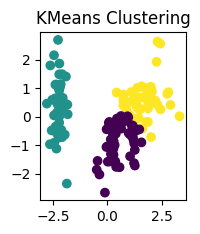

In [88]:
# Plot KMeans clusters
plt.subplot(2, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title('KMeans Clustering')

Text(0.5, 1.0, 'DBSCAN Clustering')

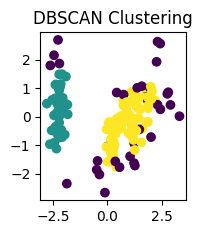

In [89]:
# Plot DBSCAN clusters
plt.subplot(2, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_clusters, cmap='viridis')
plt.title('DBSCAN Clustering')

Text(0.5, 1.0, 'Agglomerative Clustering')

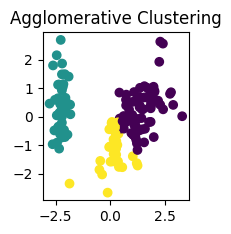

In [90]:
# Plot Agglomerative clusters
plt.subplot(2, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_clusters, cmap='viridis')
plt.title('Agglomerative Clustering')

Text(0.5, 1.0, 'Gaussian Mixture Model (GMM) Clustering')

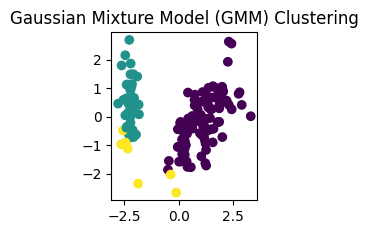

In [91]:
# Plot GMM clusters
plt.subplot(2, 3, 4)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_clusters, cmap='viridis')
plt.title('Gaussian Mixture Model (GMM) Clustering')

Text(0.5, 1.0, 'Spectral Clustering')

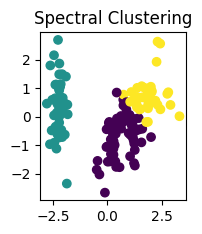

In [92]:
# Plot Spectral clusters
plt.subplot(2, 3, 5)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=spectral_clusters, cmap='viridis')
plt.title('Spectral Clustering')

In [93]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>